In [2]:
import ultraplot as uplt
import matplotlib as plt
import numpy as np
from sklearn.linear_model import TheilSenRegressor
import matplotlib.patches as patches
import pandas as pd

In [3]:
x = np.linspace(0, 364, 365)

# Parameters for modified double logistic model
a = 0.2 # Minimum EVI
b = 0.8 # Range of EVI
c = 0.0007 # Slope of greendown trend
m_1 = -0.4 # Slope of first logistic
m_2 = -0.07 # Slope of second logistic
n_1 = 150 # Start of Season
n_2 = 290 # End of Season

normal_veg = a + (b - c*x) * ( 1/(1+np.exp(m_1*(x - n_1))) - 1/(1+np.exp(m_2*(x - n_2))) )


x_test = np.arange(150, 250)
y = a + (b - c*x_test) * ( 1/(1+np.exp(m_1*(x_test - n_1))) - 1/(1+np.exp(m_2*(x_test - n_2))) )

slope, intercept = np.polyfit(x_test, y, 1)
y_ols = slope*x + intercept

# Parameters of slight defoliation
b_d = 0.1 # Decrease in maximum EVI

slight_defol = a + (b - b_d - c*x) * ( 1/(1+np.exp(m_1*(x - n_1))) - 1/(1+np.exp(m_2*(x - n_2))) )


# Parameters of severe defoliation
d = 0.4 # Strength of defol
m_3 = 0.004 # Rate of defoliation
n_3 = 180 # ~ Date of Peak Defoliation

severe_defol = a + (b - b_d - c*x) * ( 1/(1+np.exp(m_1*(x - n_1))) - 1/(1+np.exp(m_2*(x - n_2))) ) - d*np.exp(-m_3*(x - n_3)**2)

# Modified parameters of off-season harvesting
n_h = 180
b_h = 0.3

harvest = a + (b - b_h - c*x) * ( 1/(1+np.exp(m_1*(x - n_h))) - 1/(1+np.exp(m_2*(x - n_2))) )

In [4]:
x_test = np.arange(150, 250)
y = a + (b - c*x_test) * ( 1/(1+np.exp(m_1*(x_test - n_1))) - 1/(1+np.exp(m_2*(x_test - n_2))) )

theil = TheilSenRegressor()
theil.fit(x_test.reshape(-1, 1), y)

y_theil = theil.predict(x.reshape(-1, 1))

## All traits together

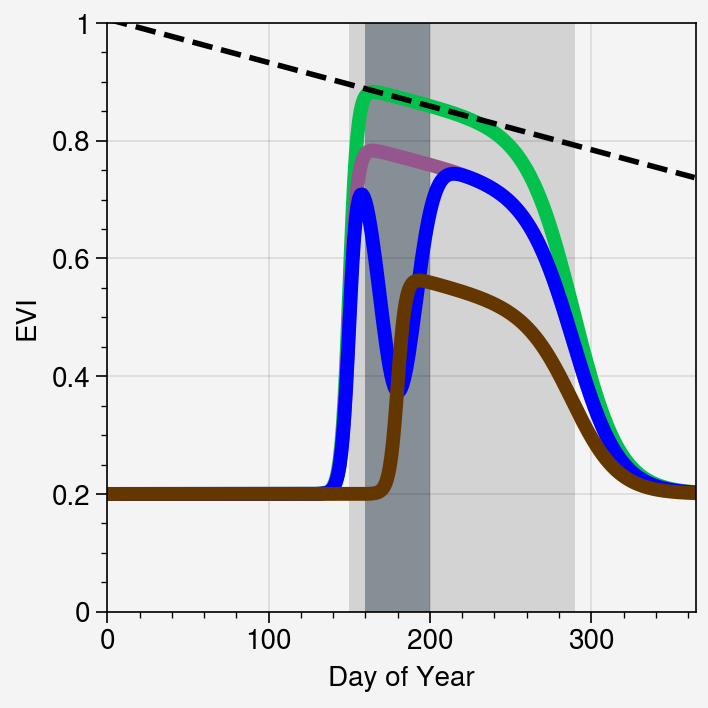

In [12]:
fig, ax = uplt.subplots(figsize=('90mm','90mm'), share=False, facecolor='none', fontsize=10)

ax.plot(x, normal_veg,   linewidth=5, label='Normal', color='shamrock green')
ax.plot(x, slight_defol, linewidth=5, label='Slight Defol', color='purple')
ax.plot(x, severe_defol, linewidth=5, label='Severe Defol', color='blue')
ax.plot(x, harvest,      linewidth=5, label='Winter Harvest', color='brown')
ax.plot(x, y_theil,        color='black', linewidth=2, linestyle='dashed', label='Within Season')

# Growing Season
rect = patches.Rectangle((150, 0), 140, 1, facecolor='lightgray', label='Growing Season')
ax.add_patch(rect)

# Defoliation Period
rect = patches.Rectangle((160, 0), 40, 1, facecolor='gray6', label='Defol. Period')
ax.add_patch(rect)

# uplt.rc['legend.fontsize'] = 8 # Note, proplot is dumb so we need to manually set fontsize.
# ax.legend(ncols=1, loc='ul')
ax.format(ylim=[0, 1], ylabel='EVI',
          xlim=[0, 365], xlabel='Day of Year')

#fig.savefig('./Figures/Theoretical_Trends.png')

## Normal Vegetation Model

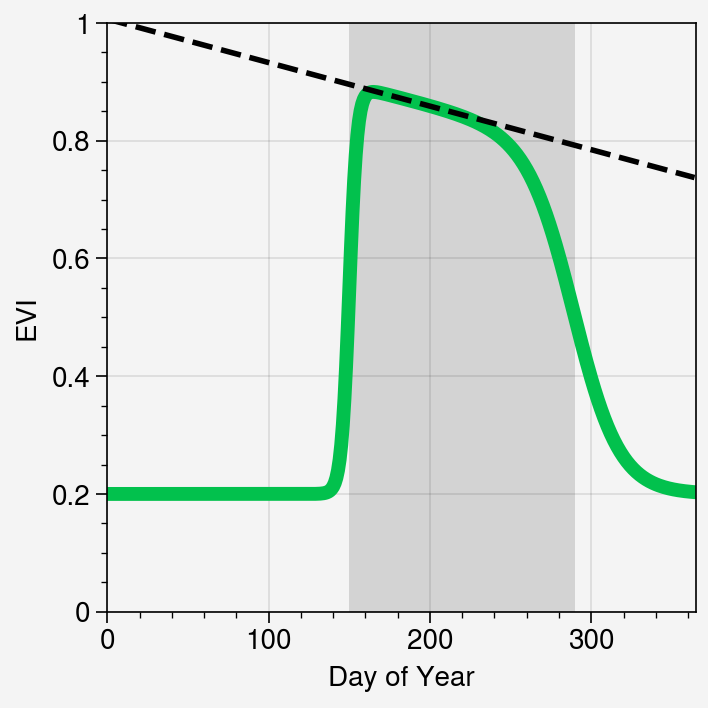

In [13]:
fig, ax = uplt.subplots(figsize=('90mm','90mm'), share=False, facecolor='none', fontsize=10)

ax.plot(x, normal_veg, linewidth=5, label='Normal', color='shamrock green')
ax.plot(x, y_theil,    color='black', linewidth=2, linestyle='dashed', label='Within Season')

# SOS/EOS
rect = patches.Rectangle((150, 0), 140, 1, facecolor='lightgray', label='Growing Season')
ax.add_patch(rect)

# uplt.rc['legend.fontsize'] = 8 # Note, proplot is dumb so we need to manually set fontsize.
# ax.legend(ncols=1, loc='ul')
ax.format(ylim=[0,1], ylabel='EVI',
          xlim=[0, 365], xlabel='Day of Year')
fig.savefig('./Figures/Theoretical_Normal Vegetation.png')

## Logging

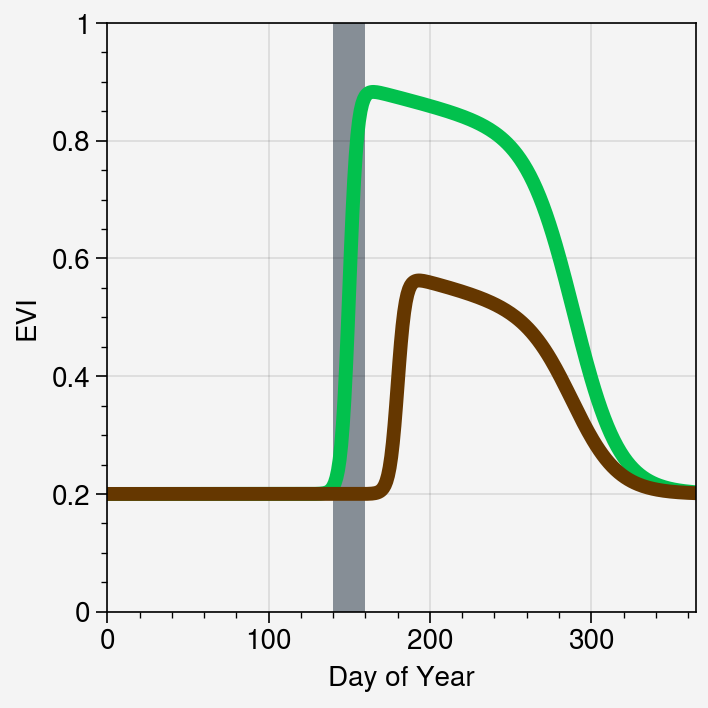

In [14]:
fig, ax = uplt.subplots(figsize=('90mm','90mm'), share=False, facecolor='none', fontsize=10)

ax.plot(x, normal_veg, linewidth=5, label='Normal', color='shamrock green')
ax.plot(x, harvest,    linewidth=5, label='Winter Harvest', color='brown')

# Normal SOS/EOS
#rect = patches.Rectangle((150, 0), 140, 1, facecolor='lightgray', label='Typical Growing Season')
#ax.add_patch(rect)

# Green up Period
rect = patches.Rectangle((140, 0),20, 1, facecolor='gray6', label='Greenup Period')
ax.add_patch(rect)

# uplt.rc['legend.fontsize'] = 8 # Note, proplot is dumb so we need to manually set fontsize.
# ax.legend(ncols=1, loc='ul')
ax.format(ylim=[0,1], ylabel='EVI',
          xlim=[0, 365], xlabel='Day of Year')
fig.savefig('./Figures/Theoretical_Winter_Harvesting.png')

## Defoliation

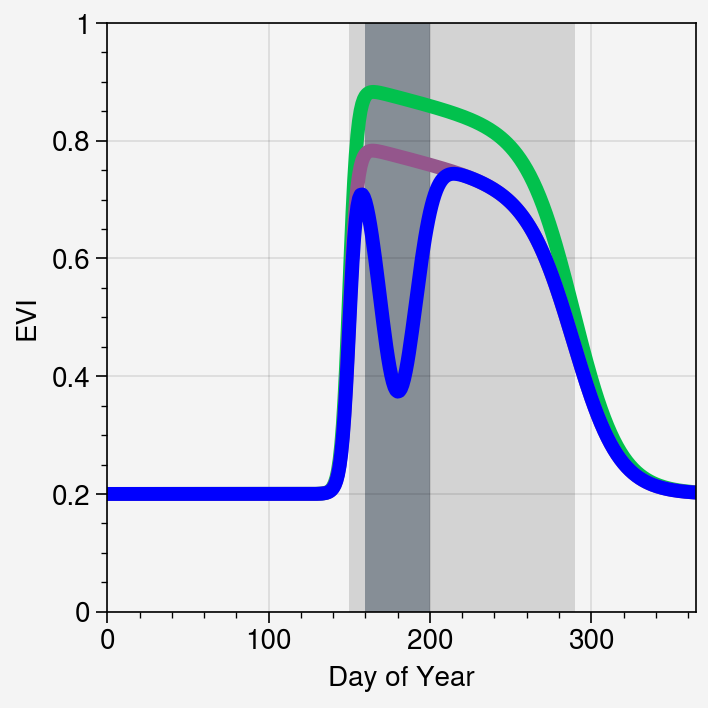

In [15]:
fig, ax = uplt.subplots(figsize=('90mm','90mm'), share=False, facecolor='none', fontsize=10)

ax.plot(x, normal_veg, linewidth=5, label='Normal', color='shamrock green')
ax.plot(x, slight_defol, linewidth=5, label='Slight Defol', color='purple')
ax.plot(x, severe_defol, linewidth=5, label='Severe Defol', color='blue')

# SOS/EOS
rect = patches.Rectangle((150, 0), 140, 1, facecolor='lightgray', label='Growing Season')
ax.add_patch(rect)

# Defoliation Period
rect = patches.Rectangle((160, 0), 40, 1, facecolor='gray6', label='Defol. Period')
ax.add_patch(rect)

# uplt.rc['legend.fontsize'] = 8 # Note, proplot is dumb so we need to manually set fontsize.
# ax.legend(ncols=1, loc='ul')
ax.format(ylim=[0,1], ylabel='EVI',
          xlim=[0, 365], xlabel='Day of Year')
fig.savefig('./Figures/Theoretical_Defoliation.png')

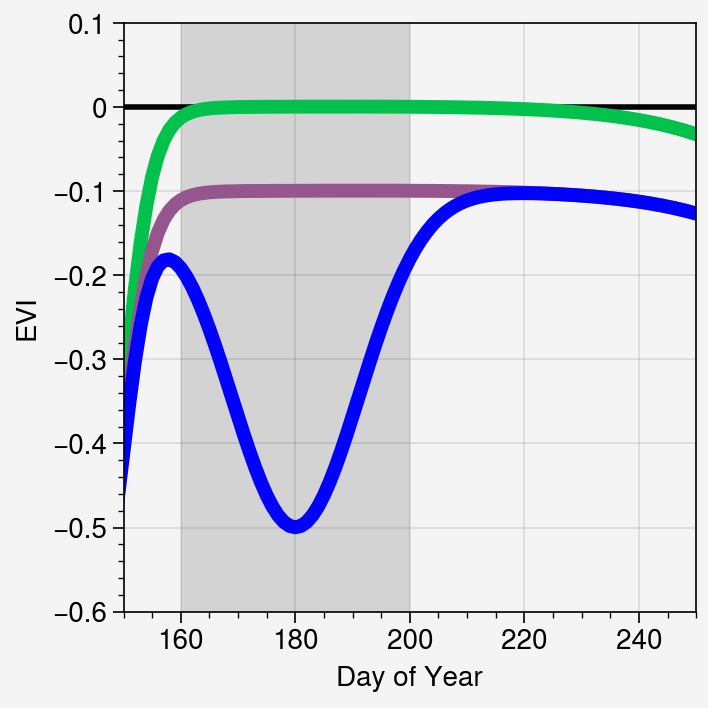

In [17]:
fig, ax = uplt.subplots(figsize=('90mm','90mm'), share=False, facecolor='none', fontsize=10)

normal_anom = normal_veg - y_theil
slight_anom = slight_defol - y_theil
severe_anom = severe_defol - y_theil

growing_season = (x > 160) & (x < 180)

ax.plot(x, y_theil - y_theil,    color='black', linewidth=2, linestyle='solid', label='Within Season')
ax.plot(x, normal_anom, linewidth=5, label='Normal', color='shamrock green')
ax.plot(x, slight_anom, linewidth=5, label='Slight Defol', color='purple')
ax.plot(x, severe_anom, linewidth=5, label='Severe Defol', color='blue')


#ax.hlines(normal_anom[growing_season].mean(), 160, 200, color='shamrock green', linestyle='dashed', linewidth=3)
#ax.hlines(slight_anom[growing_season].mean(), 160, 200, color='purple', linestyle='dashed', linewidth=3)
#ax.hlines(severe_anom[growing_season].mean(), 160, 200, color='blue', linestyle='dashed', linewidth=3)

# Defoliation Period
rect = patches.Rectangle((160, -0.6), 40, 0.7, facecolor='lightgray', label='Defol. Period', zorder=0)
ax.add_patch(rect)

# uplt.rc['legend.fontsize'] = 8 # Note, proplot is dumb so we need to manually set fontsize.
# ax.legend(ncols=1, loc='ur')
ax.format(ylim=[-0.6,0.1], ylabel='EVI',
          xlim=[150, 250], xlabel='Day of Year')
fig.savefig('./Figures/Theoretical_Defoliation_Anomaly.png')

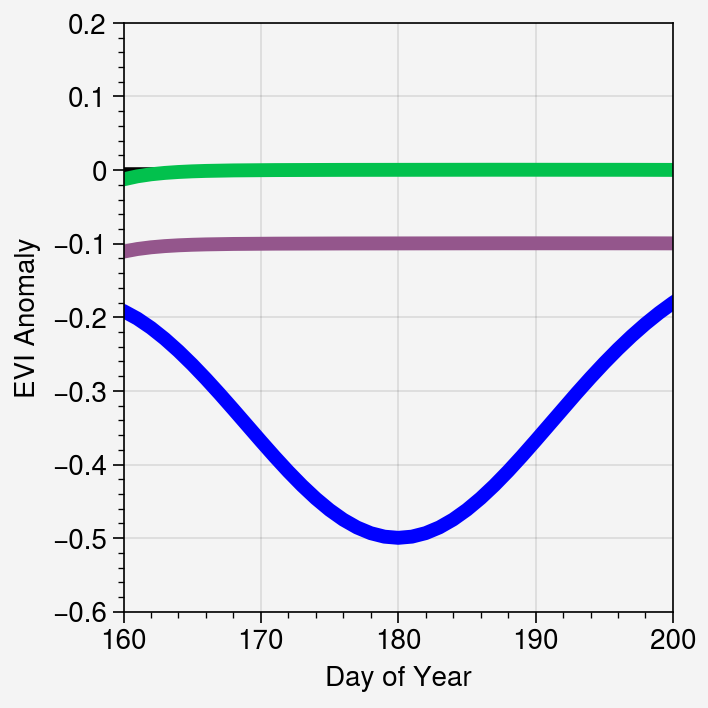

In [18]:
fig, ax = uplt.subplots(figsize=('90mm','90mm'), share=False, facecolor='none', fontsize=10)

normal_anom = normal_veg - y_theil
slight_anom = slight_defol - y_theil
severe_anom = severe_defol - y_theil

growing_season = (x > 160) & (x < 180)

ax.plot(x, y_theil - y_theil,    color='black', linewidth=2, linestyle='solid', label='Within Season')
ax.plot(x, normal_anom, linewidth=5, label='Normal', color='shamrock green')
ax.plot(x, slight_anom, linewidth=5, label='Slight Defol', color='purple')
ax.plot(x, severe_anom, linewidth=5, label='Severe Defol', color='blue')


#ax.hlines(normal_anom[growing_season].mean(), 160, 200, color='green', linestyle='dashed', linewidth=3)
#ax.hlines(slight_anom[growing_season].mean(), 160, 200, color='yellow orange', linestyle='dashed', linewidth=3)
#ax.hlines(severe_anom[growing_season].mean(), 160, 200, color='red', linestyle='dashed', linewidth=3)

# uplt.rc['legend.fontsize'] = 8 # Note, proplot is dumb so we need to manually set fontsize.
# ax.legend(ncols=1, loc='ur')
ax.format(ylim=[-0.6,0.2], ylabel='EVI Anomaly',
          xlim=[160, 200], xlabel='Day of Year')
fig.savefig('./Figures/Theoretical_Defoliation_Score.png')